In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [151]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [152]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [153]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [154]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['sex']=df['sex'].fillna(df['sex'].mode()[0])
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Encoding 

In [155]:
dfe=pd.get_dummies(df['sex'],drop_first=True,dtype=int)
dfe

,FEMALE,MALE
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
339,0,1
340,1,0
341,0,1
342,1,0


In [156]:
df_encoded=pd.concat((df,dfe),axis=1)
df_encoded

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE
0,39.10000,18.70000,181.00000,3750.000000,MALE,0,1
1,39.50000,17.40000,186.00000,3800.000000,FEMALE,1,0
2,40.30000,18.00000,195.00000,3250.000000,FEMALE,1,0
3,43.92193,17.15117,214.01462,4201.754386,MALE,0,1
4,36.70000,19.30000,193.00000,3450.000000,FEMALE,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,MALE,0,1
340,46.80000,14.30000,215.00000,4850.000000,FEMALE,1,0
341,50.40000,15.70000,222.00000,5750.000000,MALE,0,1
342,45.20000,14.80000,212.00000,5200.000000,FEMALE,1,0


In [157]:
df_encoded.drop('sex',axis=1,inplace=True)
df_encoded

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.10000,18.70000,181.00000,3750.000000,0,1
1,39.50000,17.40000,186.00000,3800.000000,1,0
2,40.30000,18.00000,195.00000,3250.000000,1,0
3,43.92193,17.15117,214.01462,4201.754386,0,1
4,36.70000,19.30000,193.00000,3450.000000,1,0
...,...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,0,1
340,46.80000,14.30000,215.00000,4850.000000,1,0
341,50.40000,15.70000,222.00000,5750.000000,0,1
342,45.20000,14.80000,212.00000,5200.000000,1,0


In [158]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(df_encoded)
    wcss.append(data.inertia_)
wcss

[242470024.08828703,
 82477910.97621548,
 59059852.37764888,
 29386681.18820126,
 16600905.368530413,
 11416225.082842724,
 8504811.239074808,
 7128748.917656293,
 4827902.112410134,
 3728122.81703898]

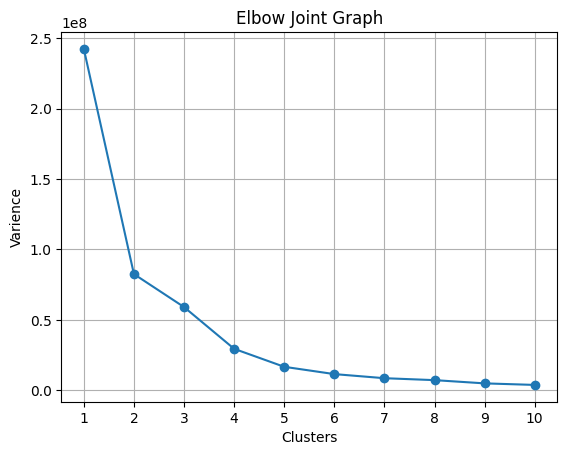

In [159]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Joint Graph')
plt.xlabel('Clusters')
plt.ylabel('Varience')
plt.xticks(range(1,11))
plt.grid()
plt.show()

In [160]:
data=KMeans(n_clusters=7,init='k-means++',random_state=42)
data.fit(df_encoded)
y_pred=data.predict(df_encoded)
y_pred

array([4, 4, 0, 5, 4, 4, 4, 1, 4, 2, 0, 4, 0, 4, 5, 4, 4, 1, 0, 5, 4, 4,
       4, 5, 4, 4, 4, 0, 0, 5, 0, 5, 0, 5, 0, 5, 5, 4, 0, 1, 0, 5, 0, 5,
       0, 1, 4, 0, 4, 5, 4, 5, 4, 5, 0, 4, 4, 4, 0, 4, 0, 5, 4, 5, 0, 5,
       0, 5, 0, 1, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 1, 4, 5, 0, 4, 4, 4,
       5, 4, 4, 5, 4, 1, 0, 5, 4, 5, 0, 5, 4, 1, 0, 5, 0, 4, 4, 5, 0, 1,
       4, 1, 0, 5, 5, 5, 0, 4, 0, 0, 0, 4, 4, 5, 0, 5, 0, 5, 0, 5, 0, 4,
       4, 1, 4, 5, 0, 5, 4, 5, 4, 4, 0, 4, 0, 4, 5, 4, 4, 4, 4, 5, 4, 5,
       4, 4, 4, 5, 0, 4, 5, 4, 4, 4, 4, 5, 4, 5, 0, 4, 4, 5, 4, 4, 0, 4,
       0, 5, 4, 4, 4, 1, 0, 5, 0, 5, 4, 5, 4, 1, 0, 1, 5, 4, 4, 4, 4, 1,
       4, 5, 0, 4, 0, 5, 4, 5, 0, 4, 0, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4,
       1, 3, 1, 3, 6, 1, 1, 6, 5, 6, 1, 3, 1, 3, 5, 3, 5, 3, 1, 6, 3, 6,
       5, 6, 6, 6, 5, 3, 1, 3, 6, 1, 6, 3, 6, 6, 6, 6, 5, 6, 5, 3, 5, 1,
       3, 1, 5, 6, 6, 6, 1, 6, 5, 6, 1, 6, 5, 6, 1, 3, 5, 6, 5, 3, 1, 3,
       1, 3, 1, 3, 1, 6, 6, 6, 1, 3, 1, 3, 1, 3, 1,

In [161]:
df_encoded['cluster']=y_pred
df_encoded

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,cluster
0,39.10000,18.70000,181.00000,3750.000000,0,1,4
1,39.50000,17.40000,186.00000,3800.000000,1,0,4
2,40.30000,18.00000,195.00000,3250.000000,1,0,0
3,43.92193,17.15117,214.01462,4201.754386,0,1,5
4,36.70000,19.30000,193.00000,3450.000000,1,0,4
...,...,...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,0,1,5
340,46.80000,14.30000,215.00000,4850.000000,1,0,1
341,50.40000,15.70000,222.00000,5750.000000,0,1,3
342,45.20000,14.80000,212.00000,5200.000000,1,0,6


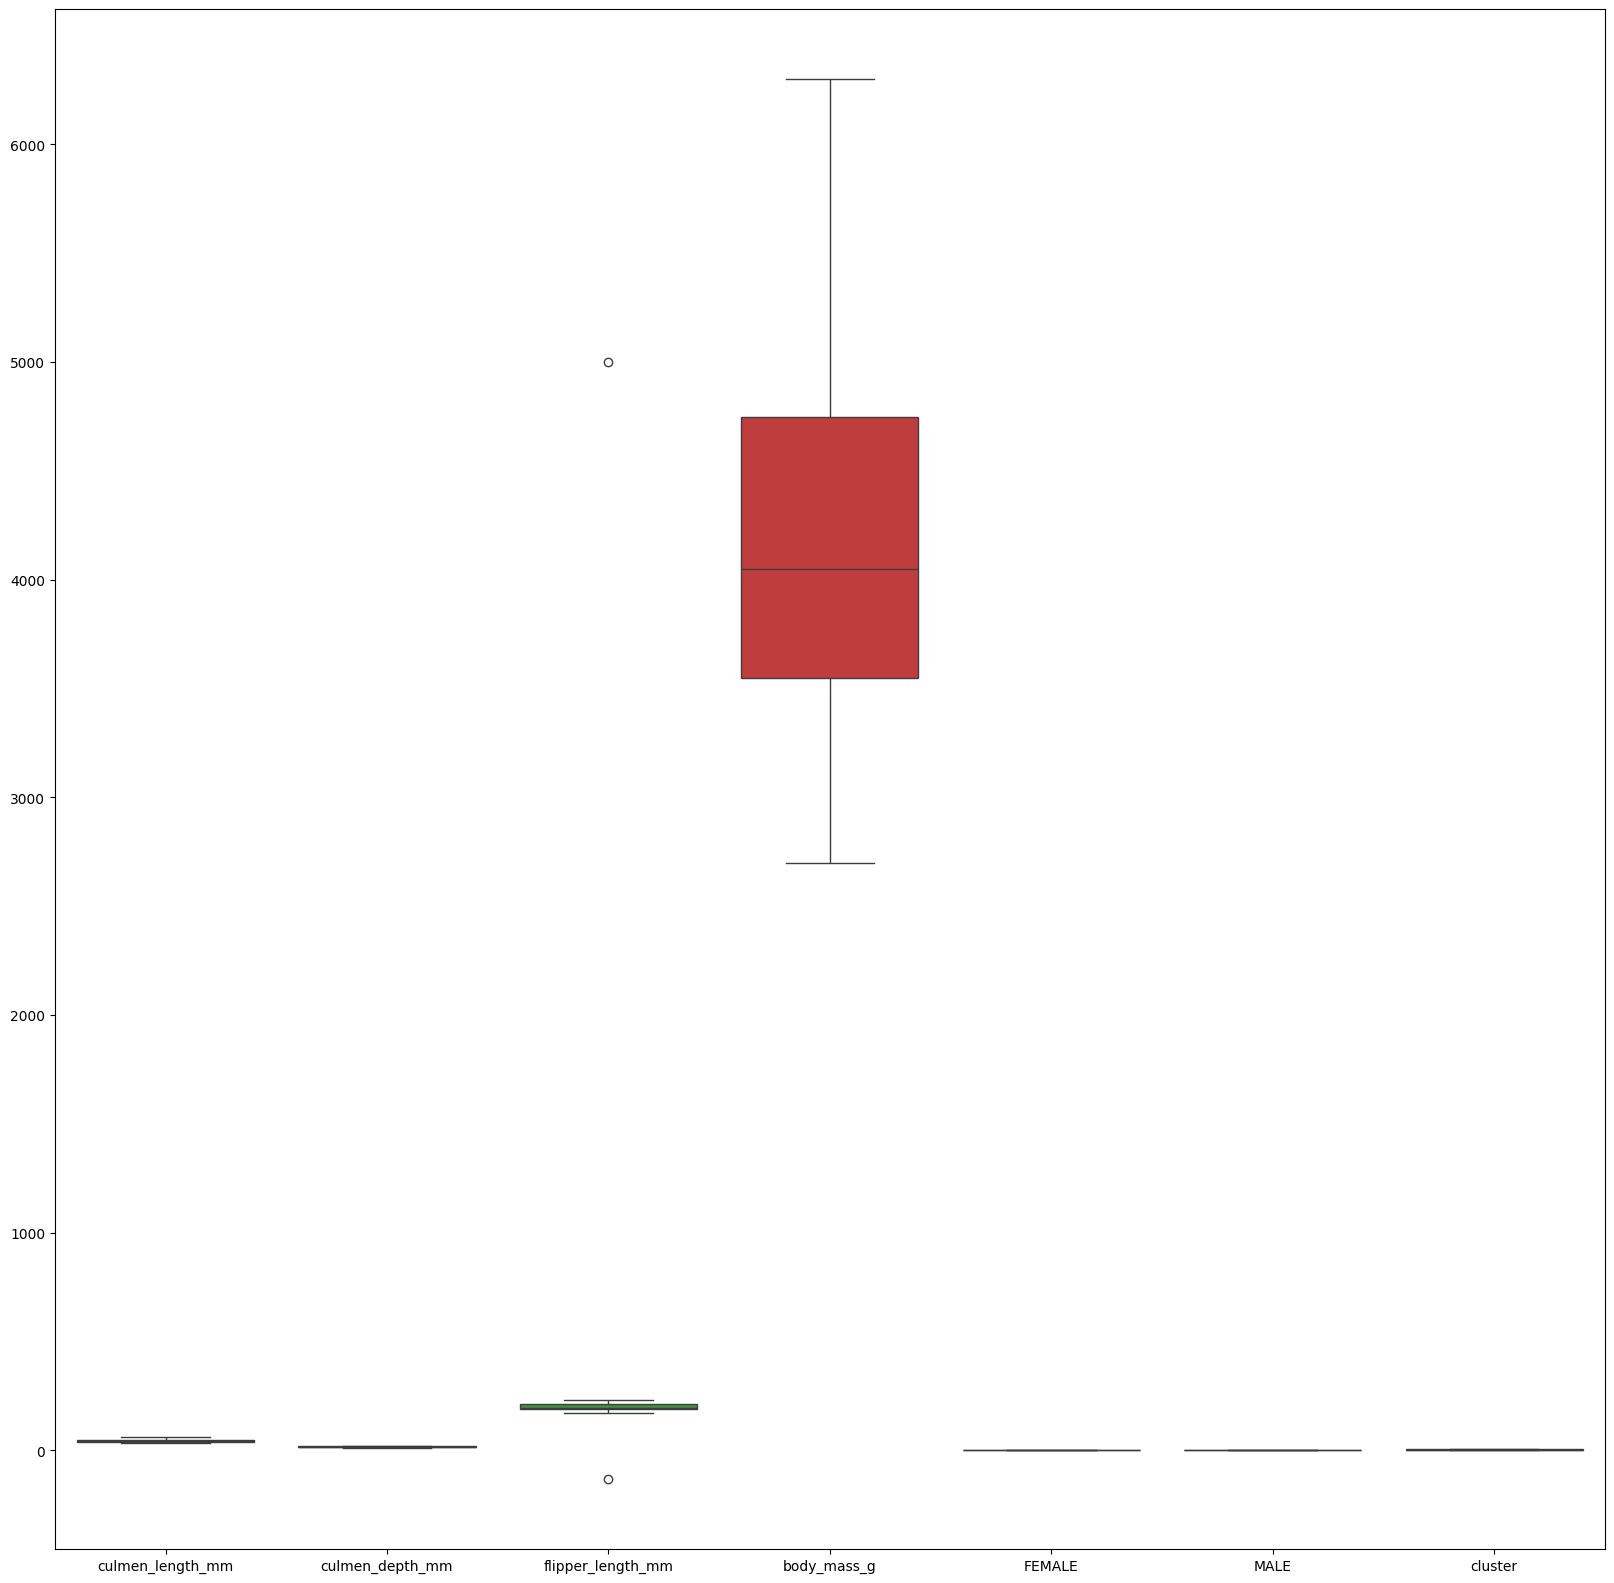

In [162]:
plt.figure(figsize=(20,20))
sns.boxplot(df_encoded)
plt.show()

In [163]:
x=df_encoded.iloc[:,:-1].values
y=df_encoded.iloc[:,-1].values

In [164]:
df_encoded['cluster'].value_counts()

cluster
4    93
5    76
1    52
0    50
6    38
3    34
2     1
Name: count, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_train

array([5, 6, 6, 5, 6, 0, 5, 4, 1, 1, 4, 4, 6, 1, 1, 0, 4, 6, 1, 4, 6, 0,
       1, 5, 1, 0, 5, 1, 3, 3, 1, 4, 1, 3, 4, 5, 5, 0, 0, 5, 4, 0, 4, 5,
       1, 4, 5, 5, 5, 4, 1, 4, 6, 4, 3, 1, 6, 0, 3, 5, 0, 3, 6, 5, 0, 3,
       1, 4, 1, 3, 3, 6, 4, 5, 3, 4, 5, 0, 5, 5, 6, 0, 1, 3, 5, 4, 1, 5,
       5, 3, 5, 4, 5, 1, 0, 3, 0, 6, 5, 3, 4, 4, 4, 4, 0, 5, 0, 4, 0, 1,
       4, 1, 5, 5, 1, 4, 4, 5, 5, 4, 6, 0, 0, 4, 3, 4, 1, 4, 4, 1, 1, 1,
       4, 1, 5, 3, 5, 4, 5, 5, 0, 5, 5, 5, 4, 5, 0, 0, 1, 4, 1, 0, 6, 0,
       6, 1, 4, 1, 4, 4, 5, 0, 4, 0, 5, 4, 0, 6, 3, 4, 1, 5, 4, 5, 6, 1,
       3, 1, 6, 4, 4, 5, 4, 0, 6, 4, 5, 4, 5, 0, 5, 0, 1, 5, 4, 3, 6, 4,
       5, 6, 4, 6, 4, 1, 5, 6, 0, 4, 0, 1, 6, 5, 4, 0, 4, 3, 6, 4, 3, 5,
       5, 1, 6, 6, 1, 4, 0, 5, 5, 4, 6, 4, 4, 6, 4, 4, 5, 4, 1, 0],
      dtype=int32)

In [166]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [167]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy',n_estimators=50)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1

array([4, 5, 1, 0, 1, 3, 6, 5, 5, 1, 6, 0, 0, 4, 1, 5, 4, 6, 3, 5, 5, 4,
       6, 5, 5, 4, 1, 5, 4, 0, 4, 4, 4, 0, 1, 0, 3, 4, 4, 4, 5, 6, 3, 4,
       5, 1, 3, 0, 4, 4, 5, 3, 3, 5, 4, 4, 0, 4, 4, 6, 5, 5, 3, 1, 3, 4,
       5, 4, 4, 0, 6, 1, 4, 3, 3, 3, 4, 4, 0, 5, 0, 1, 6, 4, 0, 4, 1, 4,
       1, 4, 5, 6, 3, 5, 5, 4, 4, 5, 6, 5, 0, 0, 0, 5], dtype=int32)

In [168]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred1)
cm

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  9]])

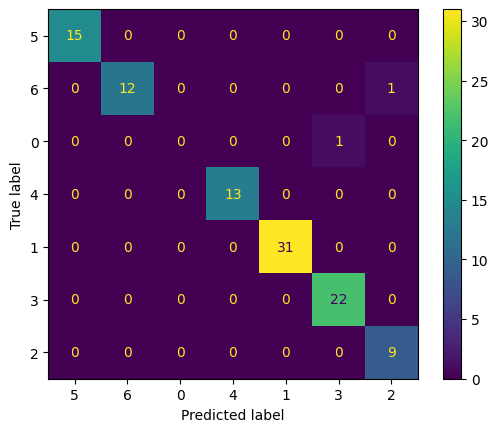

In [169]:
cmd=ConfusionMatrixDisplay(cm,display_labels=[5, 6, 0, 4, 1, 3,2])
cmd.plot()

In [170]:
acc=accuracy_score(y_test,y_pred1)
acc

0.9807692307692307

In [171]:
cfr=classification_report(y_test,y_pred1)
print(cfr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        13
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        31
           5       0.96      1.00      0.98        22
           6       0.90      1.00      0.95         9

    accuracy                           0.98       104
   macro avg       0.84      0.85      0.84       104
weighted avg       0.97      0.98      0.98       104



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


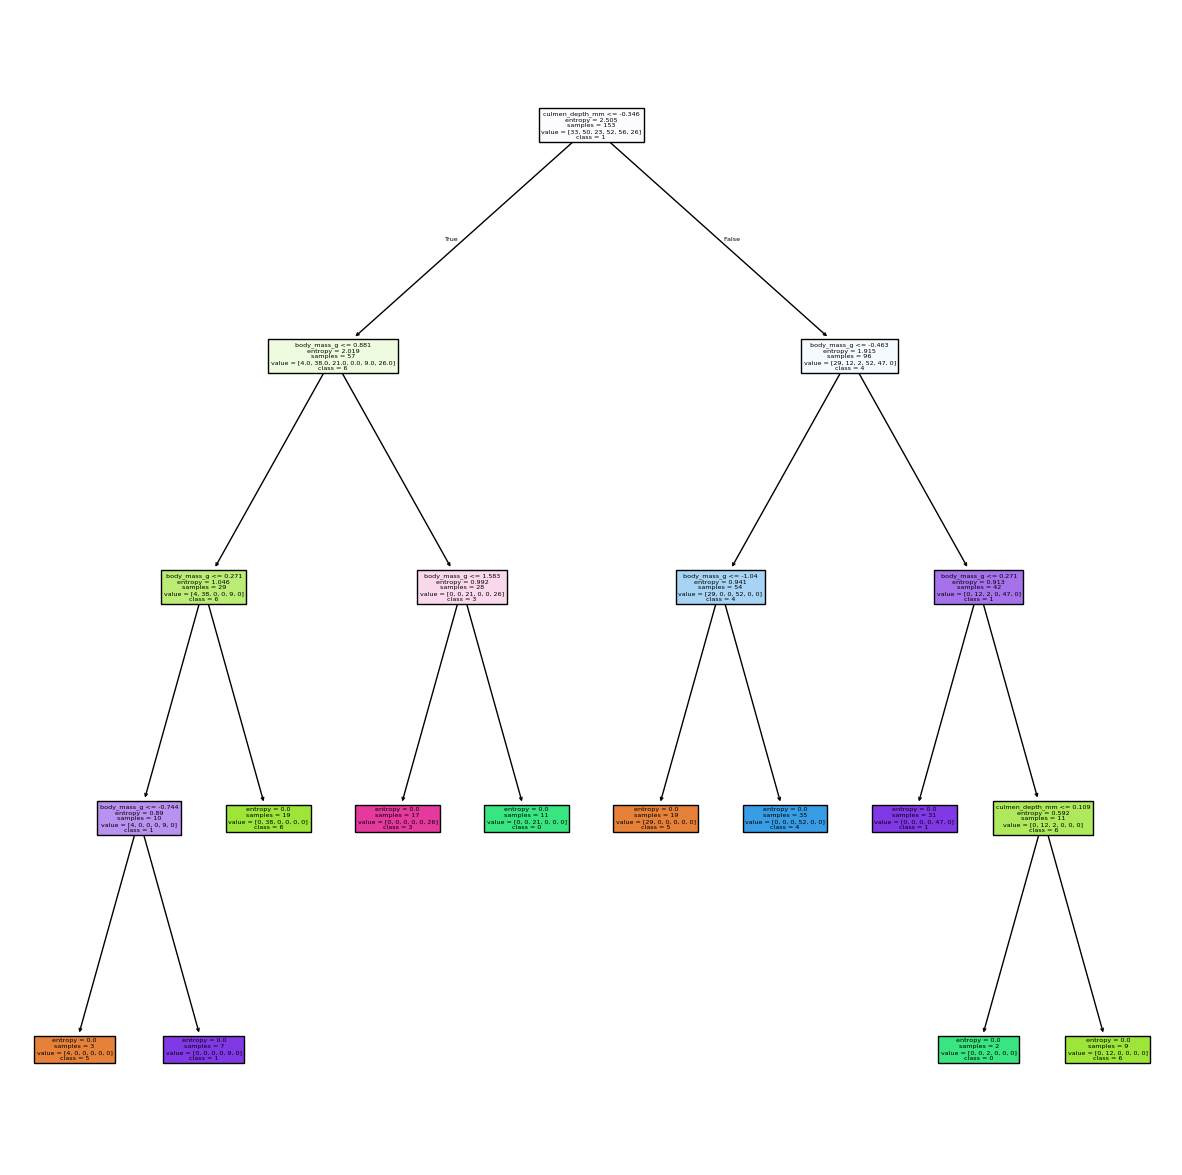

In [172]:
from sklearn import tree
individual_tree = model.estimators_[0]
plt.figure(figsize=(15,15))
tree.plot_tree(individual_tree,feature_names=df_encoded.columns,class_names=['5','6','0','4','1','3','2'],filled=True)
plt.show()